Stocks

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, make_scorer, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
# Fetch historical stock data for the top 10 tech companies
top_10_tech_symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'ADBE', 'NFLX', 'INTC']
all_data = yf.download(top_10_tech_symbols, start='2020-01-01', end='2021-12-31')

# Extract adjusted close and volume data
stock_data = all_data['Adj Close']
volume_data = all_data['Volume']

print(stock_data.head())
print(volume_data.head())
    
    

[*********************100%%**********************]  10 of 10 completed


Ticker           AAPL        ADBE       AMZN      GOOGL       INTC  \
Date                                                                 
2020-01-02  73.059425  334.429993  94.900497  68.433998  54.226269   
2020-01-03  72.349129  331.809998  93.748497  68.075996  53.566715   
2020-01-06  72.925621  333.709991  95.143997  69.890503  53.415188   
2020-01-07  72.582657  333.390015  95.343002  69.755501  52.523899   
2020-01-08  73.750244  337.869995  94.598503  70.251999  52.559547   

Ticker            META        MSFT        NFLX       NVDA       TSLA  
Date                                                                  
2020-01-02  209.779999  154.493805  329.809998  59.744045  28.684000  
2020-01-03  208.669998  152.570114  325.899994  58.787785  29.534000  
2020-01-06  212.600006  152.964447  335.829987  59.034313  30.102667  
2020-01-07  213.059998  151.569809  330.750000  59.749012  31.270666  
2020-01-08  215.220001  153.984070  339.260010  59.861088  32.809334  
Ticker      

In [3]:
# Check for missing values in stock_data
missing_values = stock_data.isna().sum()
print("Missing values in stock_data:\n", missing_values)

# Drop rows with missing values
stock_data_clean = stock_data.copy()
stock_data_clean.dropna(inplace=True)

Missing values in stock_data:
 Ticker
AAPL     0
ADBE     0
AMZN     0
GOOGL    0
INTC     0
META     0
MSFT     0
NFLX     0
NVDA     0
TSLA     0
dtype: int64


In [4]:
# Data Preprocessing
stock_data.dropna(inplace=True)

def remove_outliers(df, threshold=3):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    mean = df[numeric_cols].mean()
    std = df[numeric_cols].std()
    return df[((df[numeric_cols] - mean).abs() <= threshold * std).all(axis=1)]

stock_data = remove_outliers(stock_data)

scaler = StandardScaler()
numeric_cols = stock_data.select_dtypes(include=[np.number]).columns
stock_data[numeric_cols] = scaler.fit_transform(stock_data[numeric_cols])


C:\Users\nihar\AppData\Local\Temp\ipykernel_14956\2638654638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.dropna(inplace=True)


In [5]:
# Apply remove_outliers function to stock_data
stock_data_clean = remove_outliers(stock_data)

# Check the shape of the DataFrame before and after outlier removal
print("Shape before outlier removal:", stock_data.shape)
print("Shape after outlier removal:", stock_data_clean.shape)

# Reassign the cleaned DataFrame back to stock_data
stock_data = stock_data_clean


Shape before outlier removal: (504, 10)
Shape after outlier removal: (504, 10)


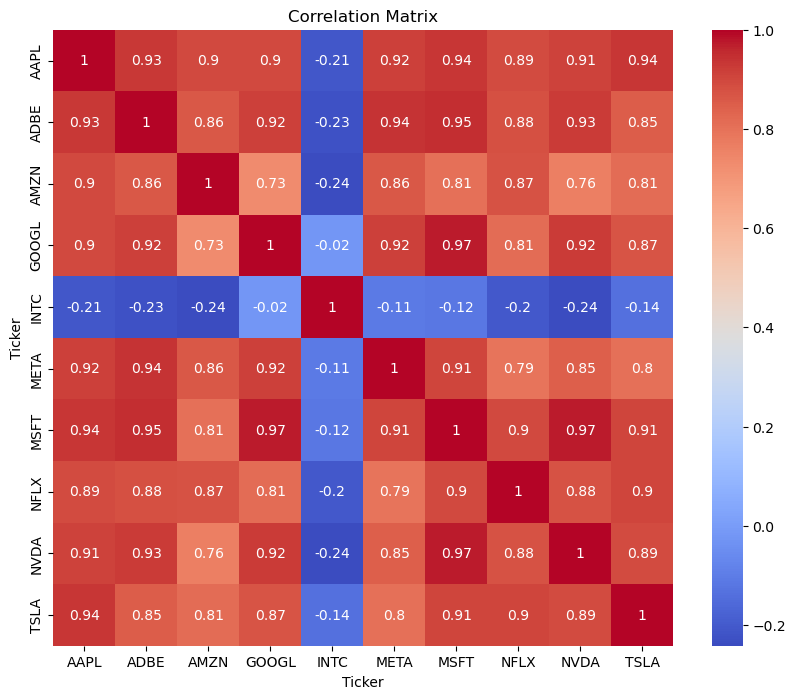

In [6]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 8))
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Moving Averages
Moving averages are commonly used in stock analysis to smooth out price data over a specific time period, making it easier to identify trends.

In [7]:
# Moving Averages
# 5-day moving average for AAPL
stock_data['MA_5_AAPL'] = stock_data['AAPL'].rolling(window=5).mean()

# 10-day moving average for AAPL
stock_data['MA_10_AAPL'] = stock_data['AAPL'].rolling(window=10).mean()

# 20-day moving average for AAPL
stock_data['MA_20_AAPL'] = stock_data['AAPL'].rolling(window=20).mean()
print(stock_data['MA_5_AAPL'])

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08   -1.471705
                ...   
2021-12-23    1.886957
2021-12-27    1.949125
2021-12-28    2.013661
2021-12-29    2.056888
2021-12-30    2.074205
Name: MA_5_AAPL, Length: 504, dtype: float64


In [8]:
print(stock_data['MA_10_AAPL'])

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2021-12-23    1.938640
2021-12-27    1.941617
2021-12-28    1.953624
2021-12-29    1.970705
2021-12-30    1.966984
Name: MA_10_AAPL, Length: 504, dtype: float64


In [9]:
print(stock_data['MA_20_AAPL'])

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2021-12-23    1.789782
2021-12-27    1.829559
2021-12-28    1.861776
2021-12-29    1.885588
2021-12-30    1.908300
Name: MA_20_AAPL, Length: 504, dtype: float64


Exponential Moving Average (EMA)
EMA gives more weight to recent prices and reacts more quickly to price changes than the simple moving average.

In [10]:
# 12-day exponential moving average
stock_data['EMA_12'] = stock_data['AAPL'].ewm(span=12, adjust=False).mean()

# 26-day exponential moving average
stock_data['EMA_26'] = stock_data['AAPL'].ewm(span=26, adjust=False).mean()


In [11]:
print(stock_data['EMA_12'])

Date
2020-01-02   -1.467389
2020-01-03   -1.471132
2020-01-06   -1.471261
2020-01-07   -1.473178
2020-01-08   -1.468647
                ...   
2021-12-23    1.874472
2021-12-27    1.913703
2021-12-28    1.941487
2021-12-29    1.965464
2021-12-30    1.979613
Name: EMA_12, Length: 504, dtype: float64


In [12]:
print(stock_data['EMA_26'])

Date
2020-01-02   -1.467389
2020-01-03   -1.469191
2020-01-06   -1.469397
2020-01-07   -1.470458
2020-01-08   -1.468478
                ...   
2021-12-23    1.711410
2021-12-27    1.742377
2021-12-28    1.768445
2021-12-29    1.792808
2021-12-30    1.812409
Name: EMA_26, Length: 504, dtype: float64


 Relative Strength Index (RSI)
RSI is a momentum indicator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions.

In [13]:
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

stock_data['RSI_14'] = compute_rsi(stock_data['AAPL'], window=14)
print(stock_data['RSI_14'])

Date
2020-01-02          NaN
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
2020-01-08          NaN
                ...    
2021-12-23    66.108856
2021-12-27    66.534449
2021-12-28    59.995048
2021-12-29    55.848749
2021-12-30    54.863681
Name: RSI_14, Length: 504, dtype: float64


Bollinger Bands
Bollinger Bands are volatility bands placed above and below a moving average, where volatility is based on the standard deviation.

In [14]:
def compute_bollinger_bands(data, window=20):
    middle_band = data.rolling(window=window).mean()
    std_dev = data.rolling(window=window).std()
    upper_band = middle_band + 2 * std_dev
    lower_band = middle_band - 2 * std_dev
    return upper_band, middle_band, lower_band

stock_data['BB_upper'], stock_data['BB_middle'], stock_data['BB_lower'] = compute_bollinger_bands(stock_data['AAPL'], window=20)
print(stock_data['BB_upper'], stock_data['BB_middle'], stock_data['BB_lower'].head())

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2021-12-23    2.230542
2021-12-27    2.239625
2021-12-28    2.246746
2021-12-29    2.266774
2021-12-30    2.272384
Name: BB_upper, Length: 504, dtype: float64 Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2021-12-23    1.789782
2021-12-27    1.829559
2021-12-28    1.861776
2021-12-29    1.885588
2021-12-30    1.908300
Name: BB_middle, Length: 504, dtype: float64 Date
2020-01-02   NaN
2020-01-03   NaN
2020-01-06   NaN
2020-01-07   NaN
2020-01-08   NaN
Name: BB_lower, dtype: float64


Volume-based features
Volume is an important aspect of stock trading, and incorporating volume-based features can be beneficial.

In [15]:
volume_data = volume_data.copy()
volume_data.loc[:, 'Volume_MA_10_AAPL'] = volume_data['AAPL'].rolling(window=10).mean()
volume_data.loc[:, 'Volume_change_AAPL'] = volume_data['AAPL'].pct_change()

# Print the first few rows to check
print(volume_data.head())


Ticker           AAPL     ADBE      AMZN     GOOGL      INTC      META  \
Date                                                                     
2020-01-02  135480400  1990100  80580000  27278000  18056000  12077100   
2020-01-03  146322800  1577600  75288000  23408000  15293900  11188400   
2020-01-06  118387200  1874700  81236000  46768000  17755200  17058900   
2020-01-07  108872000  2500800  80898000  34330000  21876100  14912400   
2020-01-08  132079200  2248500  70160000  35314000  23133500  13475000   

Ticker          MSFT     NFLX      NVDA       TSLA  Volume_MA_10_AAPL  \
Date                                                                    
2020-01-02  22622100  4485800  23753600  142981500                NaN   
2020-01-03  21116200  3806900  20538400  266677500                NaN   
2020-01-06  20813700  5663100  26263600  151995000                NaN   
2020-01-07  21634100  4703200  31485600  268231500                NaN   
2020-01-08  27746500  7104500  27710800  46

In [16]:
# Prepare the data for modeling
X = stock_data.drop(columns=['AAPL'])
y = stock_data['AAPL']


In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Check for NaN values in the training data
print("NaN values in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaN values in y_train:", y_train.isna().sum())

# If there are NaN values, you can drop them or impute them
# Option 1: Drop rows with NaN values (make sure to drop corresponding rows in y_train as well)
# X_train_scaled = X_train_scaled[~np.isnan(X_train_scaled).any(axis=1)]
# y_train = y_train[~np.isnan(X_train_scaled).any(axis=1)]

# Option 2: Impute NaN values (e.g., with the mean of each column)
from sklearn.impute import SimpleImputer
# Fit the imputer on the training data
imputer = SimpleImputer(strategy='mean')
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# Check for NaN values in the imputed data
print("NaN values in X_train_scaled_imputed:", np.isnan(X_train_scaled_imputed).sum())
print("NaN values in X_test_scaled_imputed:", np.isnan(X_test_scaled_imputed).sum())

# Fit the Linear Regression model using the imputed training data
lr_model = LinearRegression()
lr_model.fit(X_train_scaled_imputed, y_train)

# Predict using the trained model
y_pred_lr = lr_model.predict(X_test_scaled_imputed)

# Evaluate the model
print("Linear Regression R-squared:", r2_score(y_test, y_pred_lr))


NaN values in X_train_scaled: 74
NaN values in y_train: 0
NaN values in X_train_scaled_imputed: 0
NaN values in X_test_scaled_imputed: 0
Linear Regression R-squared: 0.9965575080572787


In [20]:
from sklearn.linear_model import Lasso

# Check for NaN values in the training data
print("NaN values in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaN values in y_train:", y_train.isna().sum())

# Option 1: Drop rows with NaN values (make sure to drop corresponding rows in y_train as well)
# X_train_scaled = X_train_scaled[~np.isnan(X_train_scaled).any(axis=1)]
# y_train = y_train[~np.isnan(X_train_scaled).any(axis=1)]

# Option 2: Impute NaN values (e.g., with the mean of each column)
from sklearn.impute import SimpleImputer
# Fit the imputer on the training data
imputer = SimpleImputer(strategy='mean')
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# Check for NaN values in the imputed data
print("NaN values in X_train_scaled_imputed:", np.isnan(X_train_scaled_imputed).sum())
print("NaN values in X_test_scaled_imputed:", np.isnan(X_test_scaled_imputed).sum())

# Fit the Lasso Regression model using the imputed training data
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled_imputed, y_train)

# Predict using the trained model
y_pred_lasso = lasso_model.predict(X_test_scaled_imputed)

# Evaluate the model
print("Lasso Regression R-squared:", r2_score(y_test, y_pred_lasso))


NaN values in X_train_scaled: 74
NaN values in y_train: 0
NaN values in X_train_scaled_imputed: 0
NaN values in X_test_scaled_imputed: 0
Lasso Regression R-squared: 0.9772685892509942


In [21]:
from sklearn.decomposition import PCA

# Check for NaN values in the training data
print("NaN values in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaN values in y_train:", y_train.isna().sum())

# Option 1: Drop rows with NaN values (make sure to drop corresponding rows in y_train as well)
# X_train_scaled = X_train_scaled[~np.isnan(X_train_scaled).any(axis=1)]
# y_train = y_train[~np.isnan(X_train_scaled).any(axis=1)]

# Option 2: Impute NaN values (e.g., with the mean of each column)
from sklearn.impute import SimpleImputer
# Fit the imputer on the training data
imputer = SimpleImputer(strategy='mean')
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# Check for NaN values in the imputed data
print("NaN values in X_train_scaled_imputed:", np.isnan(X_train_scaled_imputed).sum())
print("NaN values in X_test_scaled_imputed:", np.isnan(X_test_scaled_imputed).sum())

# Apply PCA after handling NaN values
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled_imputed)
X_test_pca = pca.transform(X_test_scaled_imputed)

# Fit the Linear Regression model using the PCA-transformed data
lr_model_pca = LinearRegression()
lr_model_pca.fit(X_train_pca, y_train)

# Predict using the trained model
y_pred_pca = lr_model_pca.predict(X_test_pca)

# Evaluate the model
print("PCA + Linear Regression R-squared:", r2_score(y_test, y_pred_pca))


NaN values in X_train_scaled: 74
NaN values in y_train: 0
NaN values in X_train_scaled_imputed: 0
NaN values in X_test_scaled_imputed: 0
PCA + Linear Regression R-squared: 0.9843642142679628


In [22]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Discretize the target variable into classes
y_train_discrete = np.digitize(y_train, bins=np.histogram_bin_edges(y_train, bins=3))
y_test_discrete = np.digitize(y_test, bins=np.histogram_bin_edges(y_test, bins=3))

# Impute missing values in the training set
imputer = SimpleImputer(strategy='mean')
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)

# Impute missing values in the test set
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# Build and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled_imputed, y_train_discrete)

# Predict on the test set
y_pred = knn.predict(X_test_scaled_imputed)

# Evaluate the classifier
accuracy = accuracy_score(y_test_discrete, y_pred)
print("KNN Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test_discrete, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate classification report
cr = classification_report(y_test_discrete, y_pred, zero_division=1)
print("\nClassification Report:")
print(cr)

KNN Accuracy: 0.9702970297029703
Confusion Matrix:
[[32  0  0  0]
 [ 1 36  0  0]
 [ 0  1 30  0]
 [ 0  0  1  0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        32
           2       0.97      0.97      0.97        37
           3       0.97      0.97      0.97        31
           4       1.00      0.00      0.00         1

    accuracy                           0.97       101
   macro avg       0.98      0.74      0.73       101
weighted avg       0.97      0.97      0.97       101



In [23]:
#adaboost
# Assuming 'AAPL' is the target column
target = stock_data['AAPL']

# Convert 'target' to binary based on a threshold
threshold = 0.5
y_binary = (target > threshold).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute missing values in the training set
imputer = SimpleImputer(strategy='mean')
X_train_ada_imputed = imputer.fit_transform(X_train_scaled)

# Impute missing values in the test set
X_test_ada_imputed = imputer.transform(X_test_scaled)

# Build and train the AdaBoost classifier
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME')
ada_model.fit(X_train_ada_imputed, y_train)

# Predict on the test set
y_pred_ada = ada_model.predict(X_test_ada_imputed)

# Evaluate the classifier
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Accuracy:", accuracy_ada)

# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ada))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada))


AdaBoost Accuracy: 0.9801980198019802
Confusion Matrix:
[[61  2]
 [ 0 38]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.95      1.00      0.97        38

    accuracy                           0.98       101
   macro avg       0.97      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



In [25]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Discretize the target variable into bins
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform', subsample=200_000)
y_train_discretized = discretizer.fit_transform(y_train.values.reshape(-1, 1)).astype(int).ravel()
y_test_discretized = discretizer.transform(y_test.values.reshape(-1, 1)).astype(int).ravel()

# Fit the model with the discretized target variable
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled_imputed, y_train_discretized)
y_pred_log_reg = log_reg.predict(X_test_scaled_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test_discretized, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test_discretized, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test_discretized, y_pred_log_reg))


Logistic Regression Accuracy: 0.9801980198019802
Confusion Matrix:
 [[62  1]
 [ 1 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           2       0.97      0.97      0.97        38

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



In [26]:
# Assuming 'AAPL' is the target column
target = stock_data['AAPL']

# Convert 'target' to binary based on a threshold
threshold = 0.5
y_binary = (target > threshold).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute missing values in the training set
imputer = SimpleImputer(strategy='mean')
X_train_svm_imputed = imputer.fit_transform(X_train_scaled)

# Impute missing values in the test set
X_test_svm_imputed = imputer.transform(X_test_scaled)

# Build and train the SVM classifier
svm_model = SVC()
svm_model.fit(X_train_svm_imputed, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_svm_imputed)

# Evaluate the classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9702970297029703
Confusion Matrix:
[[61  2]
 [ 1 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.95      0.97      0.96        38

    accuracy                           0.97       101
   macro avg       0.97      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



In [27]:
# Assuming 'AAPL' is the target column
target = stock_data['AAPL']

# Convert 'target' to binary based on a threshold
threshold = 0.5
y_binary = (target > threshold).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute missing values in the training set
imputer = SimpleImputer(strategy='mean')
X_train_rf_imputed = imputer.fit_transform(X_train_scaled)

# Impute missing values in the test set
X_test_rf_imputed = imputer.transform(X_test_scaled)

# Build and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf_imputed, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_rf_imputed)

# Evaluate the classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9801980198019802
Confusion Matrix:
[[61  2]
 [ 0 38]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.95      1.00      0.97        38

    accuracy                           0.98       101
   macro avg       0.97      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



In [28]:
# Assuming 'AAPL' is the target column
target = stock_data['AAPL']

# Convert 'target' to binary based on a threshold
threshold = 0.5
y_binary = (target > threshold).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute missing values in the training set
imputer = SimpleImputer(strategy='mean')
X_train_gb_imputed = imputer.fit_transform(X_train_scaled)

# Impute missing values in the test set
X_test_gb_imputed = imputer.transform(X_test_scaled)

# Build and train the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_gb_imputed, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test_gb_imputed)

# Evaluate the classifier
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9801980198019802
Confusion Matrix:
[[61  2]
 [ 0 38]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.95      1.00      0.97        38

    accuracy                           0.98       101
   macro avg       0.97      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



In [29]:
# Assuming 'AAPL' is the target column
target = stock_data['AAPL']

# Convert 'target' to binary based on a threshold
threshold = 0.5
y_binary = (target > threshold).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute missing values in the training set
imputer = SimpleImputer(strategy='mean')
X_train_gb_imputed = imputer.fit_transform(X_train_scaled)

# Impute missing values in the test set
X_test_gb_imputed = imputer.transform(X_test_scaled)

# Build and train the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_gb_imputed, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test_gb_imputed)

# Evaluate the classifier
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9801980198019802
Confusion Matrix:
[[61  2]
 [ 0 38]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.95      1.00      0.97        38

    accuracy                           0.98       101
   macro avg       0.97      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101

